In [2]:
import numpy as np
import pylab as plt
import matplotlib.animation as animation
import matplotlib
from kuramoto import Kuramoto
from scipy.signal import welch
import seaborn as sns
from IPython.display import HTML

plt.style.use('ggplot')

# Set the parameters for the Kuramoto model.

In [3]:
# Defining time array
t0, t1, dt = 0, 40, 0.01
T = np.arange(t0, t1, dt)
 
# Y0, W, K are initial phase, intrinsic freq and
# coupling K matrix respectively

nOsc = 20
k = 1

np.random.seed(0)
Y0 = np.random.uniform(low=0.0, high=2*np.pi, size=nOsc)
W = np.random.uniform(low=0.0, high=50.0, size=nOsc)
K = k * np.ones(shape=(nOsc,nOsc))


# Passing parameters as a dictionary
init_params = {'W':W, 'K':K, 'Y0':Y0}

# Numerically solve the model and plot the results.

In [4]:
# Running Kuramoto model
kuramoto = Kuramoto(init_params)
odePhi = kuramoto.solve(T)
 
# Computing phase dynamics
phaseDynamics = np.diff(odePhi)/dt

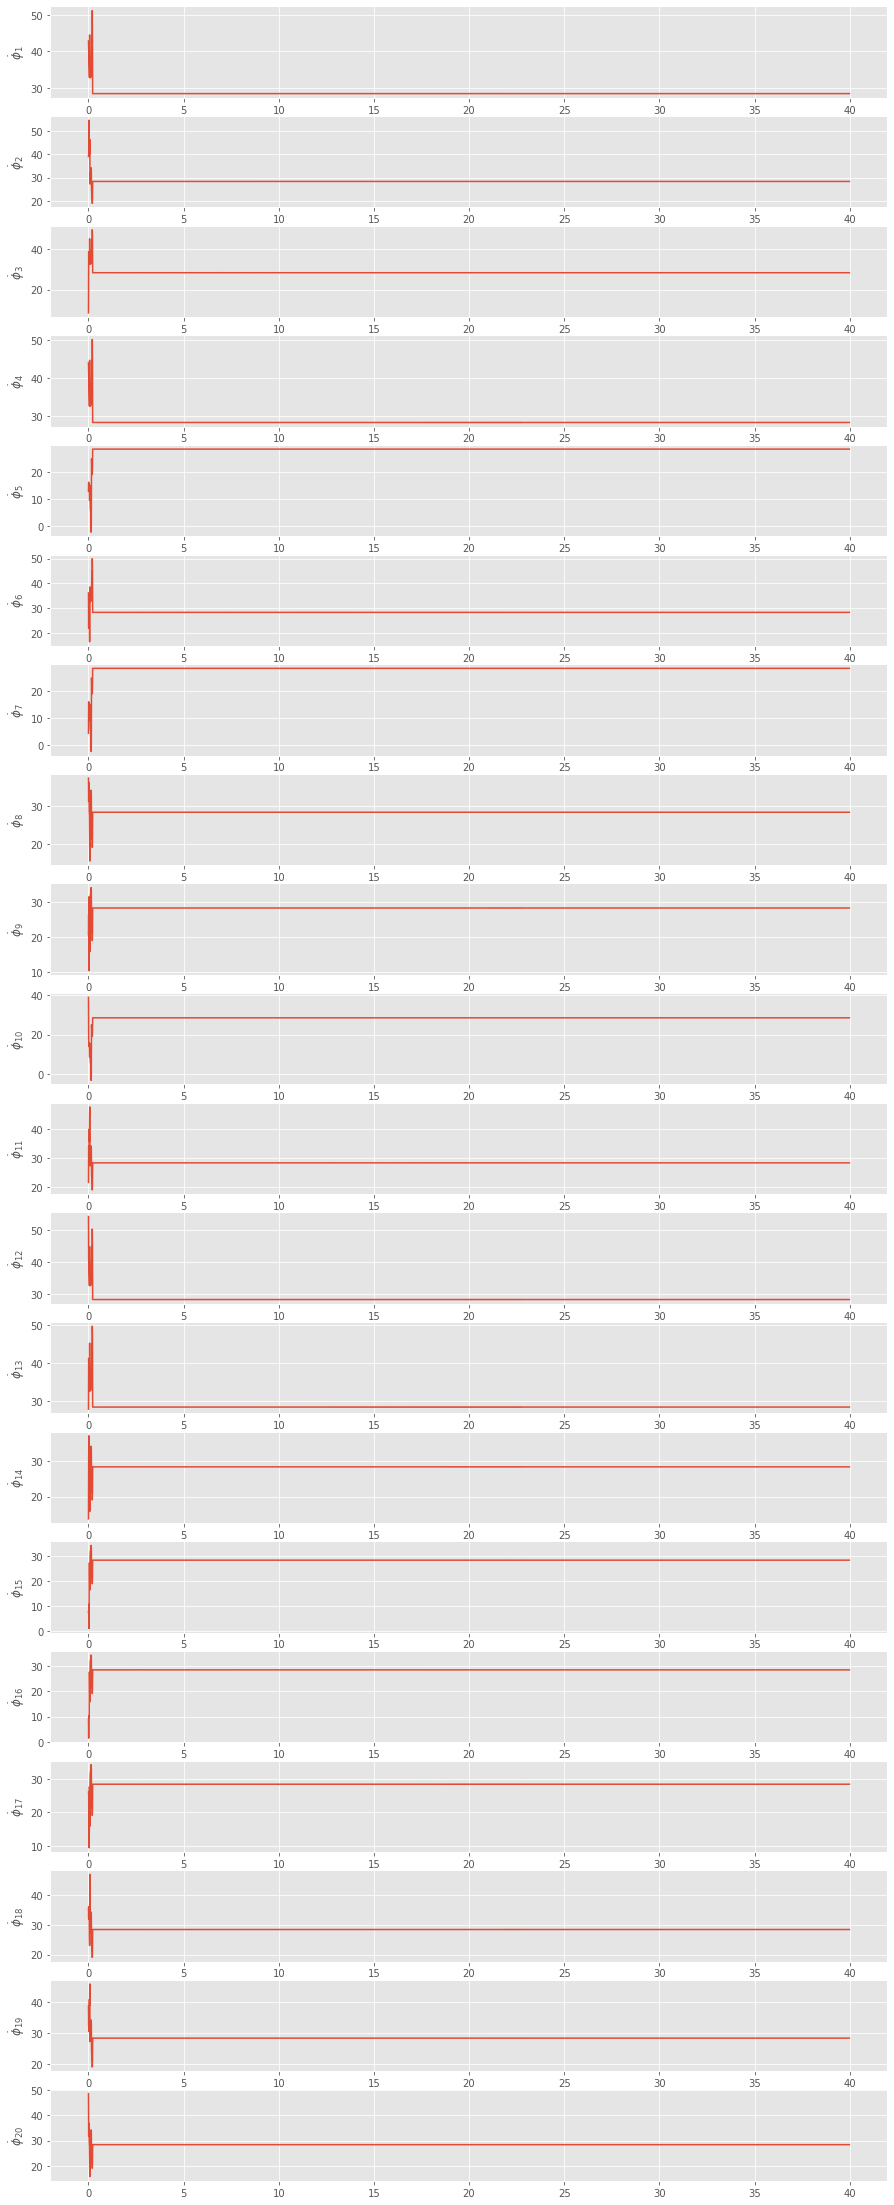

In [5]:
# Plotting response
nOsc = len(W)
plt.figure(figsize=(15,2 * nOsc))
for osc in range(nOsc):
    plt.subplot(nOsc, 1, 1+osc)
    plt.plot(T[:-1], phaseDynamics[osc])
    plt.ylabel("$\dot\phi_{%i}$" %(osc+1))
plt.show()

In [6]:
phaseDynamics[:,20]

array([51.15403292, 19.09697456, 49.72121786, 50.27520292, 18.99115688,
       49.95349651, 18.99584173, 19.11473626, 19.05880023, 19.04235089,
       19.01753367, 50.25701226, 49.71635   , 19.06564159, 18.97186085,
       19.07267088, 19.0718895 , 19.07257269, 19.1146282 , 19.08155159])

# Plot the frequency distribution of oscillators

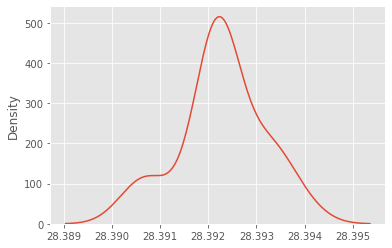

In [10]:
sns.kdeplot(phaseDynamics[:,200]);

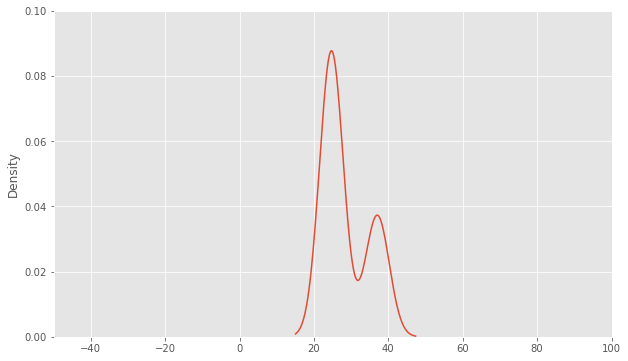

In [28]:
fig = plt.figure(figsize=(10,6))

def animate(i):
    plt.clf()
    plt.xlim(-50, 100)
    plt.ylim(0, .1)
    p = sns.kdeplot(phaseDynamics[:,i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=20, repeat=True)
HTML(ani.to_html5_video())

# Calculate and plot the power spectral density.

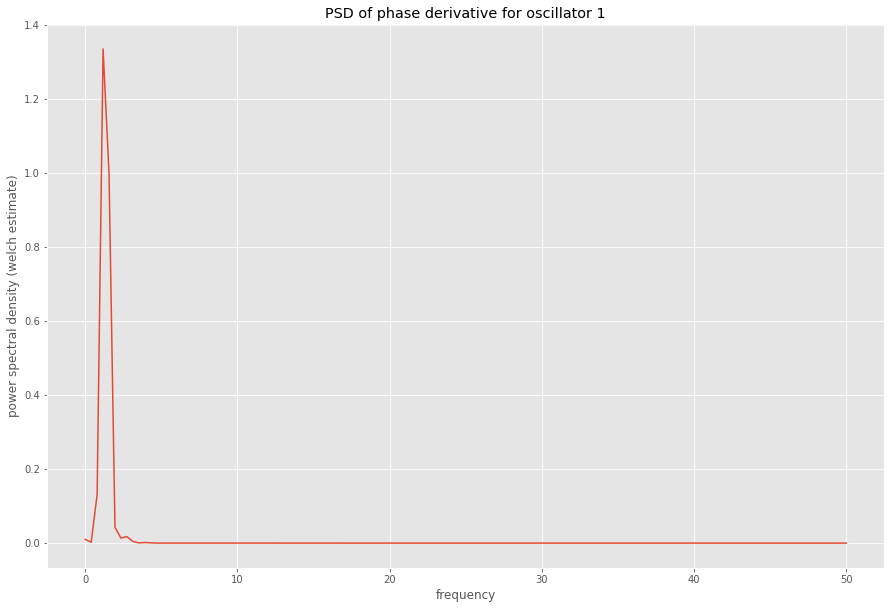

In [ ]:
oscIndex = 1

f, psd, = welch(phaseDynamics[oscIndex], 1/dt)
plt.figure(figsize=(15,10))
plt.plot(f,psd)
plt.title("PSD of phase derivative for oscillator {}".format(oscIndex))
plt.xlabel('frequency')
plt.ylabel('power spectral density (welch estimate)');